<a href="https://colab.research.google.com/github/theperiperi/Machine-Learning-Sem-IV/blob/main/KMeans_and_PCA(ML_Lab_sem_IV).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# using functions

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


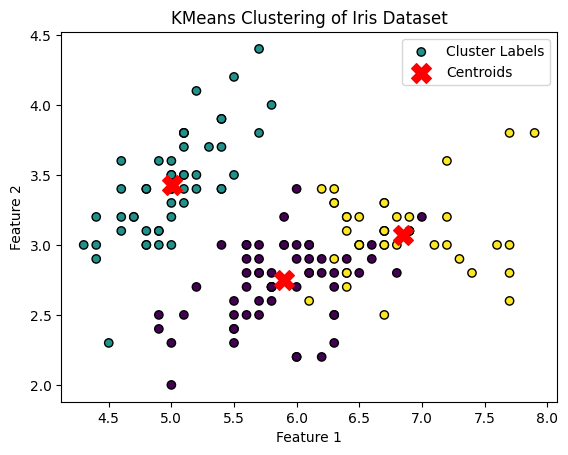

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = iris.data

# Instantiate and fit the KMeans model
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
labels = kmeans.labels_

# Plot the original data points and color them based on the predicted labels
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', edgecolors='k', label='Cluster Labels')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('KMeans Clustering of Iris Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


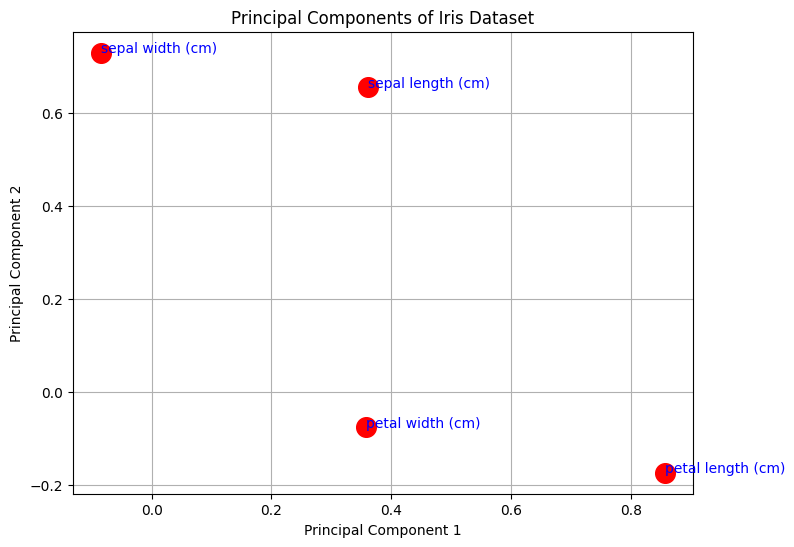

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = iris.data

# Instantiate and fit the PCA model
pca = PCA(n_components=2)
pca.fit(data)
components = pca.components_

# Plot the principal components
plt.figure(figsize=(8, 6))
plt.scatter(components[0], components[1], marker='o', s=200, color='red')
plt.title('Principal Components of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Annotate the components with feature names
for i, feature in enumerate(iris.feature_names):
    plt.annotate(feature, (components[0, i], components[1, i]), color='blue')

plt.grid(True)
plt.show()


# mathematical implementation

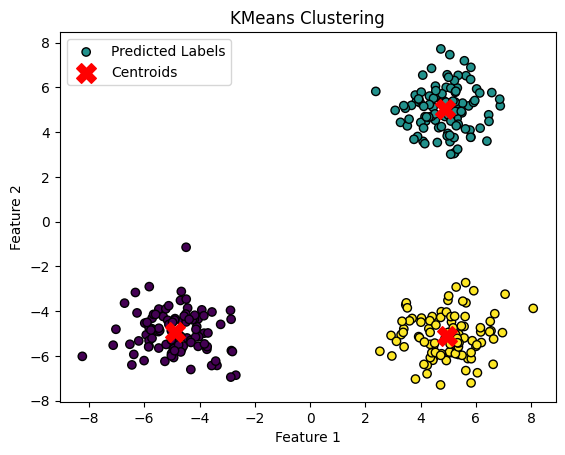

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, n_clusters, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
        self.labels = None

    def fit(self, data):
        # Initialize centroids randomly
        self.centroids = np.random.rand(self.n_clusters, data.shape[1])

        # Iterate until convergence or maximum number of iterations reached
        for _ in range(self.max_iter):
            # Assign data points to clusters
            distances = np.linalg.norm(data[:, np.newaxis, :] - self.centroids, axis=2)
            self.labels = np.argmin(distances, axis=1)

            # Update centroids
            new_centroids = np.array([np.mean(data[self.labels == i], axis=0) for i in range(self.n_clusters)])
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids

# Generate synthetic data with three clusters
np.random.seed(42)
data1 = np.random.randn(100, 2) + np.array([5, 5])
data2 = np.random.randn(100, 2) + np.array([-5, -5])
data3 = np.random.randn(100, 2) + np.array([5, -5])
data = np.vstack([data1, data2, data3])

# Instantiate and fit the KMeans model
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

# Plot the original data points and centroids
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels, cmap='viridis', marker='o', edgecolors='k', label='Predicted Labels')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


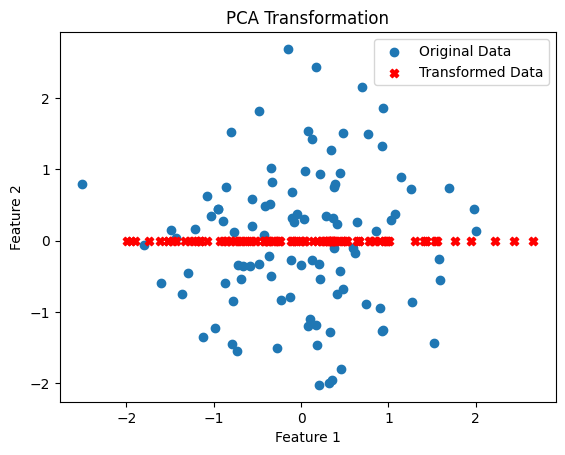

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None

    def fit(self, data):
        # Center the data
        data -= np.mean(data, axis=0)

        # Compute the covariance matrix
        covariance_matrix = np.cov(data, rowvar=False)

        # Compute the eigenvectors and eigenvalues of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        # Sort the eigenvectors by their eigenvalues in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[:, sorted_indices]

        # Select the top n_components eigenvectors
        self.components = eigenvectors[:, :self.n_components]

    def transform(self, data):
        # Center the data
        data -= np.mean(data, axis=0)

        # Project the data onto the principal components
        return np.dot(data, self.components)

# Generate synthetic data
np.random.seed(42)
data = np.random.randn(100, 2) + np.array([3, 5])

# Instantiate and fit the PCA model
pca = PCA(n_components=1)
pca.fit(data)

# Transform the data using the principal components
transformed_data = pca.transform(data)

# Plot the original data points and transformed data
plt.scatter(data[:, 0], data[:, 1], label='Original Data')
plt.scatter(transformed_data, np.zeros_like(transformed_data), label='Transformed Data', marker='X', color='red')
plt.title('PCA Transformation')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
